In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Downloads\\daily-total-female-births.csv")
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


<Axes: xlabel='Date', ylabel='Births'>

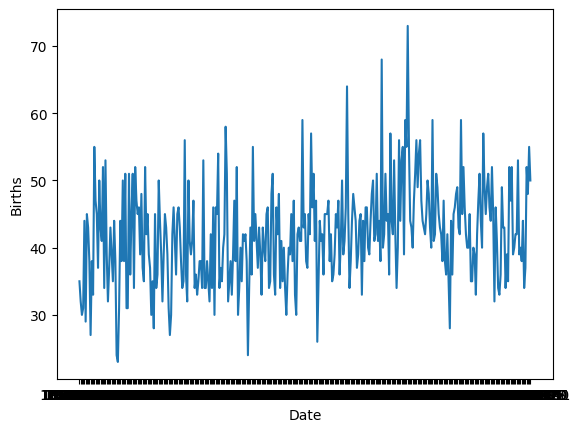

In [3]:
import seaborn as sns
sns.lineplot(x=df['Date'], y=df['Births'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
rsult = adfuller(df['Births'].values)

In [14]:
print("ADF statistic", rsult[0])
print("p-value", rsult[1])
# p-value is less than 0.05 stationary

ADF statistic -4.808291253559767
p-value 5.243412990149787e-05


In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Downloads\\shampoo_sales.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
rsult = adfuller(df['Sales'].values)
print("ADF statistic", rsult[0])
print("p-value", rsult[1])
# p-value is less than 0.05 stationary

ADF statistic 3.060142083641182
p-value 1.0


<Axes: xlabel='Month', ylabel='Sales'>

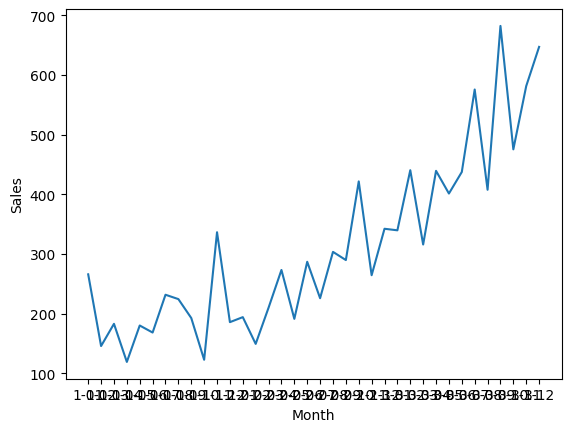

In [4]:
import seaborn as sns
sns.lineplot(x=df['Month'], y=df['Sales'])

In [5]:
def differences(df, interval=1):
    diff = []
    for i in range(interval, len(df)):
        value = df[i]-df[i-interval]
        diff.append(value)
    return pd.Series(diff)

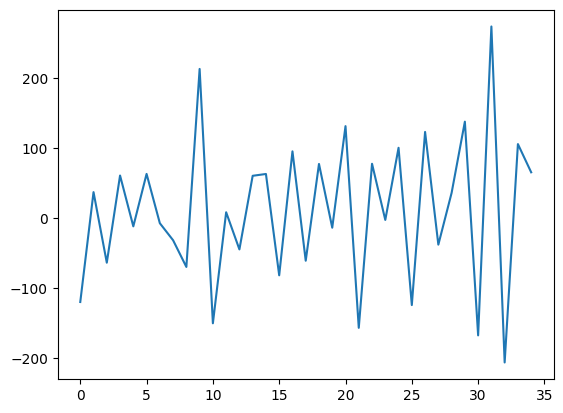

In [6]:
plt.plot(differences(df['Sales']))

In [7]:
rsult = adfuller(differences(df['Sales']))
print("ADF statistic", rsult[0])
print("p-value", rsult[1])
# p-value is less than 0.05 stationary

ADF statistic -7.249074055553854
p-value 1.7998574141687034e-10
